### Convolutional Neural Networks with Fashion MNIST Data

This notebook shows how to use Convolutional Neural Networks to classify images. MNIST Fashion used as the dataset, which includes of black-and-white photos.



In [ ]:
# Install TensorFlow
import tensorflow as tf

# Additional Imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
# Load in the Data
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)


The dataset is 2D, but the convolution operation expects a 3D dataset. 2D images are no problem for feedforward neural nets because we flatten them first, but for convolution, you must convert them to 3D objects:

* (Height x Width x Color)

In [ ]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape)

(60000, 28, 28, 1)


In [ ]:
# Find the number of classes
K = len(set(y_train))
print("Number of Classes:", K)

Number of Classes: 10


In [ ]:
shape = X_train[0].shape

In [ ]:
# Build the model using the functional API
i = Input(shape=shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [ ]:
# Compile and Fit ! Make sure that you're using GPU for this
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 24s 6ms/step - loss: 0.5565 - accuracy: 0.8070 - val_loss: 0.4211 - val_accuracy: 0.8409
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3939 - accuracy: 0.8527 - val_loss: 0.3668 - val_accuracy: 0.8649
Epoch 3/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3583 - accuracy: 0.8663 - val_loss: 0.3726 - val_accuracy: 0.8652
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3388 - accuracy: 0.8728 - val_loss: 0.3955 - val_accuracy: 0.8563
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3150 - accuracy: 0.8821 - val_loss: 0.3498 - val_accuracy: 0.8771
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2989 - accuracy: 0.8876 - val_loss: 0.3415 - val_accuracy: 0.8730
Epoch 7/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2878 - accuracy: 0.8923 - val_loss: 0.3414 - val_ac

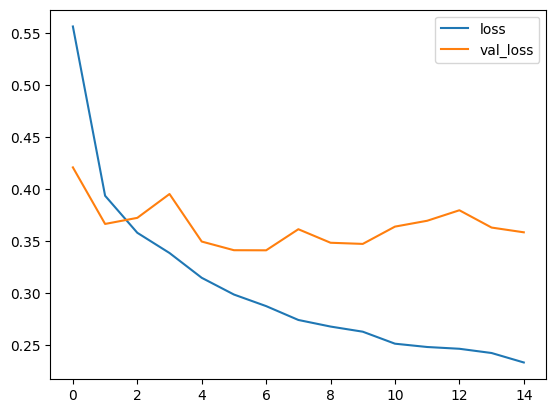

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

It seems like the model is overfitting. The validation loss showed no changes (even goes up slightly) after a certain point.

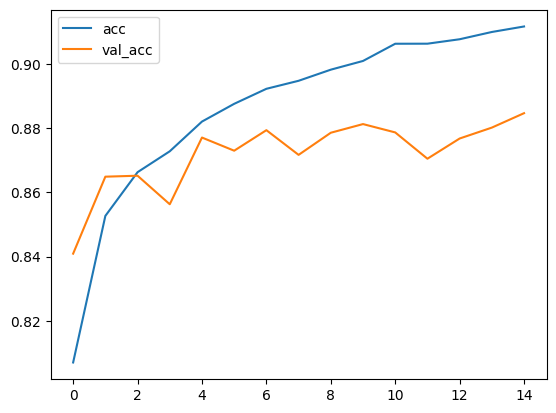

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without Normalization")

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.xticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

313/313 [==============================] - 3s 10ms/step
Confusion Matrix, without Normalization
[[855   1  18  21   2   1  98   1   3   0]
 [  5 970   1  20   2   0   2   0   0   0]
 [ 12   0 805  10  75   0  96   0   2   0]
 [ 12   2  24 910  20   0  30   0   2   0]
 [  1   1  64  45 784   0 103   0   2   0]
 [  0   0   0   1   0 971   0  19   0   9]
 [122   1  86  26  72   0 678   0  15   0]
 [  0   0   0   0   0  19   0 957   1  23]
 [  2   0   7   5   1   2  10   2 969   2]
 [  0   0   0   0   0   7   1  44   0 948]]


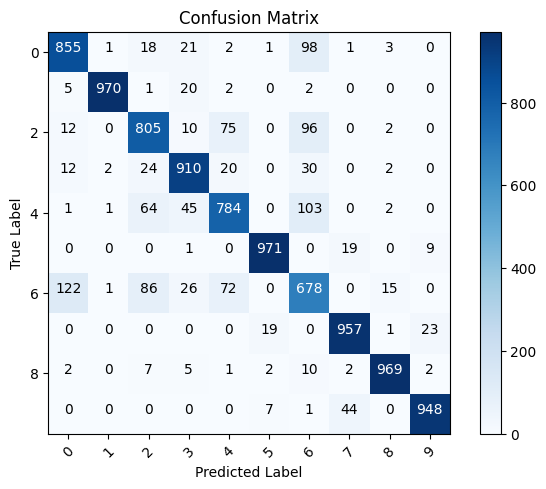

In [ ]:
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# Label Mapping
labels = '''Tshirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle-boot'''.split()

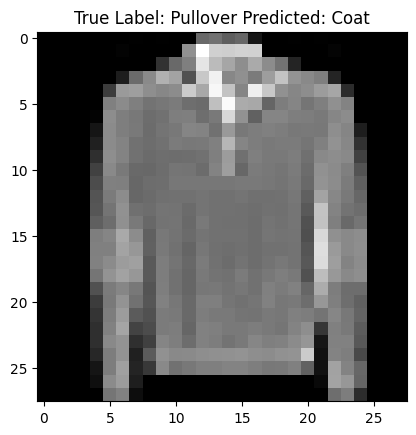

In [ ]:
# See some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.title('True Label: %s Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]));

It's likely for model to confuse the Pullover with coat since their structure resembles each other.